## 2표본 다항(비율) 차이분석 ==> chi-square.test

In [1]:
# -*- coding: utf-8 -*-
#컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels
import math

In [2]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon.csv', skipinitialspace=True)

In [3]:
#변수 확인
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

   no  type  category   amount  week
0   1     1       4.0  99300.0   1.0
1   2     1       2.0  98300.0   1.0
2   4     2       NaN      NaN   NaN
3   6     1       NaN      NaN   NaN
4   9     2       NaN      NaN   NaN
      no  type  category    amount  week
196  295     2       NaN       NaN   NaN
197  296     2       NaN       NaN   NaN
198  298     2       NaN       NaN   NaN
199  299     2       4.0  152400.0   1.0
200  300     2       1.0   37600.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
no          201 non-null int64
type        201 non-null int64
category    117 non-null float64
amount      117 non-null float64
week        117 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None
               no        type    category         amount        week
count  201.000000  201.000000  117.000000     117.000000  117.000000
mean   149.323383    1.437811    2.495726   86906.837607    0.555556
std  

In [4]:
#서브셋 데이터 생성
my_df.category.value_counts(normalize=False, sort=False, dropna=False)

 4.0    29
 2.0    30
NaN     84
 3.0    29
 1.0    29
Name: category, dtype: int64

In [5]:
sb_df = my_df[my_df.category.notnull()]

In [6]:
sb_df.category.value_counts(normalize=False, sort=False)
sb_df.category.value_counts(normalize=True, sort=False)

4.0    0.247863
2.0    0.256410
3.0    0.247863
1.0    0.247863
Name: category, dtype: float64

In [7]:
sb_df.type.value_counts(normalize=False, sort=False)
sb_df.type.value_counts(normalize=True, sort=False)

1    0.649573
2    0.350427
Name: type, dtype: float64

In [8]:
#이름정의
category_lables = {1: 'travel', 2: 'beauty', 3: 'food', 4: 'apparals'}
type_lables = {1: 'discount', 2: 'mileage'}

In [9]:
category_fq = sb_df.category.apply(lambda x: category_lables[x]).value_counts(normalize=False, sort=False)
category_rt = sb_df.category.apply(lambda x: category_lables[x]).value_counts(normalize=True, sort=False)
type_fq = sb_df.type.apply(lambda x: type_lables[x]).value_counts(normalize=False, sort=False)
type_rt = sb_df.type.apply(lambda x: type_lables[x]).value_counts(normalize=True, sort=False)

In [10]:
print(category_fq)
print(category_rt)
print(type_fq)
print(type_rt)

beauty      30
travel      29
apparals    29
food        29
Name: category, dtype: int64
beauty      0.256410
travel      0.247863
apparals    0.247863
food        0.247863
Name: category, dtype: float64
mileage     41
discount    76
Name: type, dtype: int64
mileage     0.350427
discount    0.649573
Name: type, dtype: float64


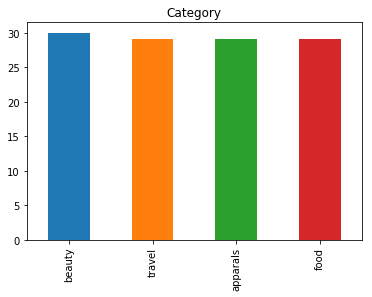

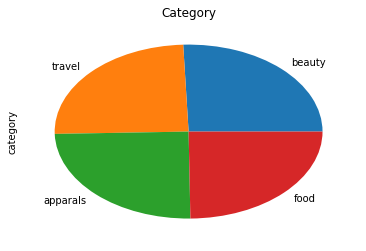

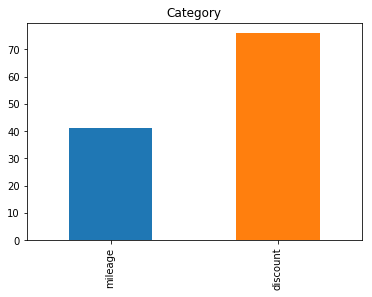

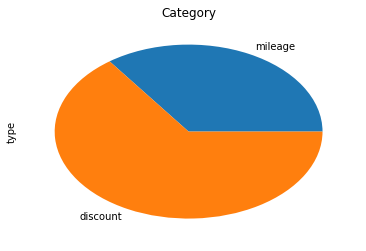

In [11]:
plt.figure(0)
category_fq.plot(kind='bar', title=u'Category')
plt.figure(1)
category_fq.plot(kind='pie', title=u'Category')
plt.figure(2)
type_fq.plot(kind='bar', title=u'Category')
plt.figure(3)
type_fq.plot(kind='pie', title=u'Category')

Chi = 28.350, p-value = 0.000, df = 8


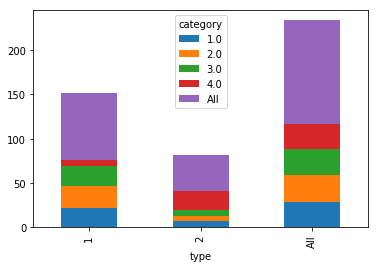

In [12]:
my_df_cross = pd.crosstab(my_df.type, my_df.category, margins=True)
#my_df_cross.columns = category_lables.values()
#my_df_cross.index = type_lables.values()
my_df_cross.plot(kind = 'bar', stacked = 1)

pd.crosstab(my_df.type, my_df.category, margins=False)

stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)
(a, b, c, d) = stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)
print('Chi = %4.3f, p-value = %4.3f, df = %0.0d'% (a, b, c))

## end of documents